# 4 Discovering Interpretable Features

In this chapter, you'll learn about a dimension reduction technique called "Non-negative matrix factorization" ("NMF") that expresses samples as combinations of interpretable parts. For example, it expresses documents as combinations of topics, and images in terms of commonly occurring visual patterns. You'll also learn to use NMF to build recommender systems that can find you similar articles to read, or musical artists that match your listening history!

# NMF applied to Wikipedia articles

In the video, you saw NMF applied to transform a toy word-frequency array. Now it's your turn to apply NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix articles. Here, fit the model and transform the articles. In the next exercise, you'll explore the result.

# Instructions:

- Import NMF from sklearn.decomposition.
- Create an NMF instance called model with 6 components.
- Fit the model to the word count data articles.
- Use the .transform() method of model to transform articles, and assign the result to nmf_features.
- Print nmf_features to get a first idea what it looks like (.round(2) rounds the entries to 2 decimal places.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from scipy.sparse import csr_matrix

documents = pd.read_csv('wikipedia-vectors.csv', index_col=0)
titles = documents.columns
articles = csr_matrix(documents.values).T

In [4]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components = 6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.56]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.48]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.35 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.37 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.46 0.   0.   0.  ]
 [0.   0.01 0.02 0.51 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.43 0.   0.  ]
 [0.   0.   0.   0.49 0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.57 0.   0.  ]
 [0.   0.   0.   0.52 0.01 0.01]
 [0.   0.4

# NMF features of the Wikipedia articles

Now you will explore the NMF features you created in the previous exercise. A solution to the previous exercise has been pre-loaded, so the array nmf_features is available. Also available is a list titles giving the title of each Wikipedia article.

When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!).

# Instructions:

- Import pandas as pd.
- Create a DataFrame df from nmf_features using pd.DataFrame(). Set the index to titles using index=titles.
- Use the .loc[] accessor of df to select the row with title 'Anne Hathaway', and print the result. These are the NMF features for the article about the actress Anne Hathaway.
- Repeat the last step for 'Denzel Washington' (another actor).

In [5]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003815
1    0.000000
2    0.000000
3    0.571945
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005575
2    0.000000
3    0.419622
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


# NMF reconstructs samples

In this exercise, you'll check your understanding of how NMF reconstructs samples from its components using the NMF feature values. On the right are the components of an NMF model. If the NMF feature values of a sample are [2, 1], then which of the following is most likely to represent the original sample? A pen and paper will help here! You have to apply the same technique Ben used in the video to reconstruct the sample [0.1203 0.1764 0.3195 0.141].

# Possible answers

(x) [2.2, 1.1, 2.1].

( ) [0.5, 1.6, 3.1].

( ) [-4.0, 1.0, -2.0].

# NMF learns topics of documents

In the video, you learned when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier using the Wikipedia articles. Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.

The NMF model you built earlier is available as model, while words is a list of the words that label the columns of the word-frequency array.

After you are done, take a moment to recognize the topic that the articles about Anne Hathaway and Denzel Washington have in common!

# Instructions:

- Import pandas as pd.
- Create a DataFrame components_df from model.components_, setting columns=words so that columns are labeled by the words.
- Print components_df.shape to check the dimensions of the DataFrame.
- Use the .iloc[] accessor on the DataFrame components_df to select row 3. Assign the result to component.
- Call the .nlargest() method of component, and print the result. This gives the five words with the highest values for that component.

In [7]:
sample_feature = np.array([2, 1])
components = np.array([[1. , 0.5, 0. ],
                       [0.2, 0.1, 2.1]])

In [8]:
np.matmul(sample_feature.T, components)

array([2.2, 1.1, 2.1])

In [11]:
words = []
with open('wikipedia-vocabulary-utf8.txt') as f:
    words = f.read().splitlines()

In [12]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

(6, 13125)
film       0.632017
award      0.254799
starred    0.246902
role       0.212845
actress    0.187626
Name: 3, dtype: float64


# Explore the LED digits dataset

In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array samples, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

# Instructions:

- Import matplotlib.pyplot as plt.
- Select row 0 of samples and assign the result to digit. For example, to select column 2 of an array a, you could use a[:,2]. Remember that since samples is a NumPy array, you can't use the .loc[] or iloc[] accessors to select specific rows or columns.
- Print digit. This has been done for you. Notice that it is a 1D array of 0s and 1s.
- Use the .reshape() method of digit to get a 2D array with shape (13, 8). Assign the result to bitmap.
- Print bitmap, and notice that the 1s show the digit 7!
Use the plt.imshow() function to display bitmap as an image.

In [14]:
df = pd.read_csv('lcd.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
samples = df.values

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


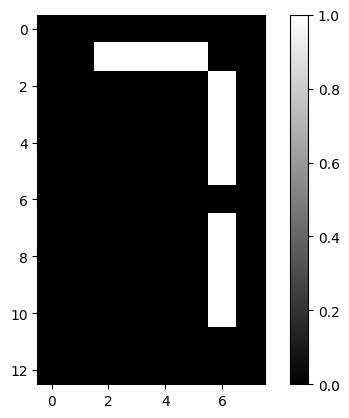

In [17]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

# NMF learns the parts of images

Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array samples. This time, you are also provided with a function show_as_image() that displays the image encoded by any 1D array:

def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()
After you are done, take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

# Instructions:

- Import NMF from sklearn.decomposition.
- Create an NMF instance called model with 7 components. (7 is the number of cells in an LED display).
- Apply the .fit_transform() method of model to samples. Assign the result to features.
- To each component of the model (accessed via model.components_), apply the show_as_image() function to that component inside the loop.
- Assign the row 0 of features to digit_features.
- Print digit_features.

In [19]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [20]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()

[2.57347960e-01 0.00000000e+00 0.00000000e+00 3.94333376e-01
 3.64045642e-01 0.00000000e+00 3.51281933e-14]


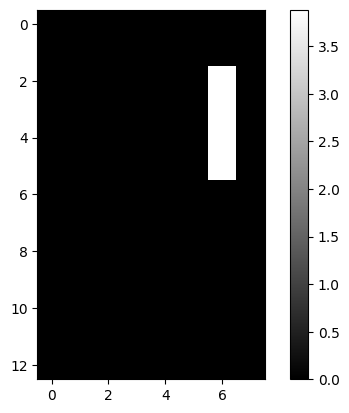

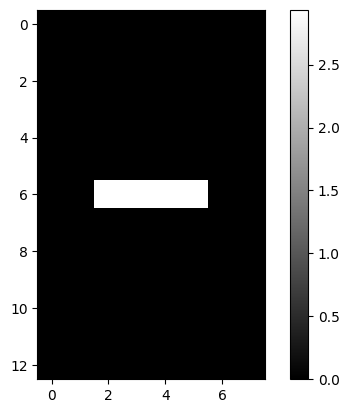

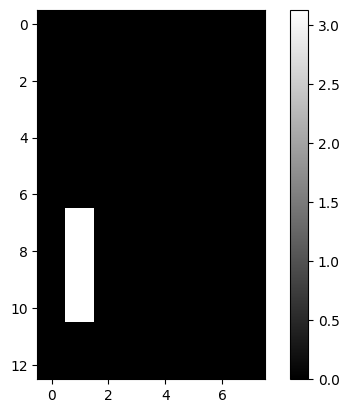

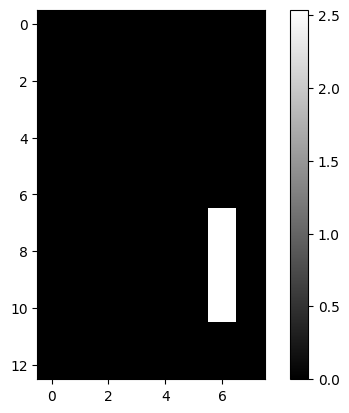

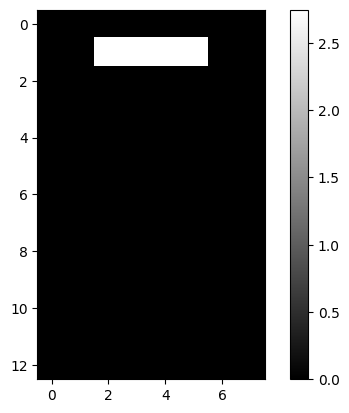

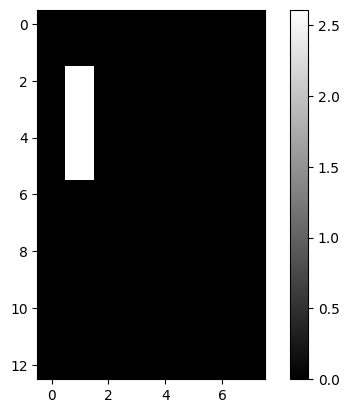

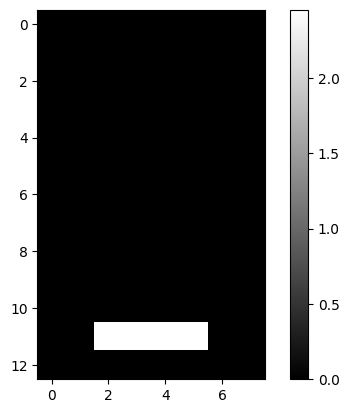

In [21]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components = 7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

# PCA doesn't learn parts

Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array samples. Also available is a modified version of the show_as_image() function which colors a pixel red if the value is negative.

After submitting the answer, notice that the components of PCA do not represent meaningful parts of images of LED digits!

# Instructions:

- Import PCA from sklearn.decomposition.
- Create a PCA instance called model with 7 components.
- Apply the .fit_transform() method of model to samples. Assign the result to features.
- To each component of the model (accessed via model.components_), apply the show_as_image() function to that component inside the loop.

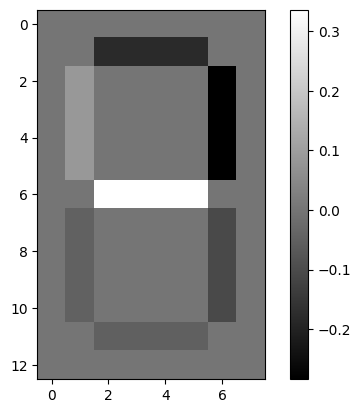

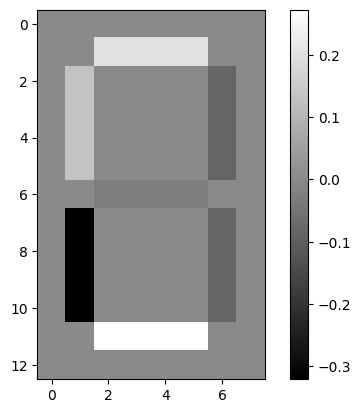

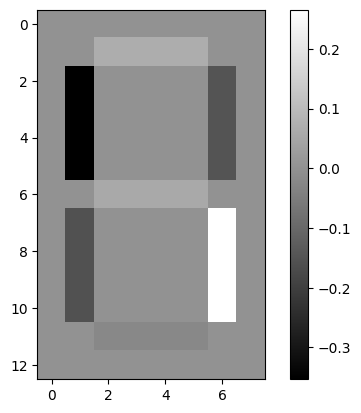

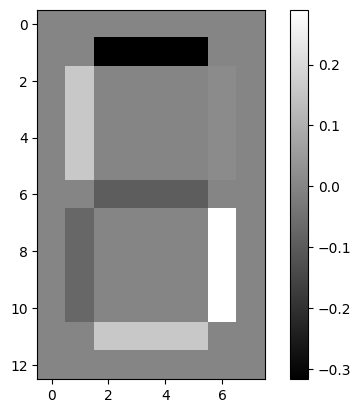

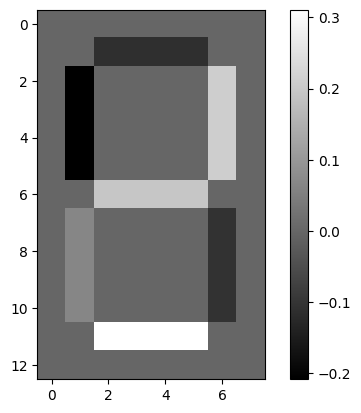

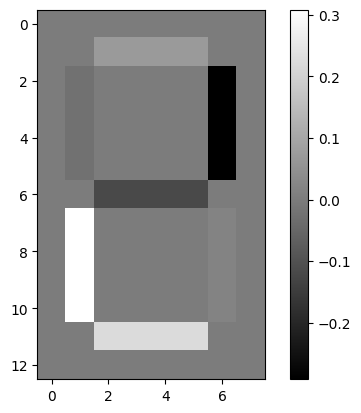

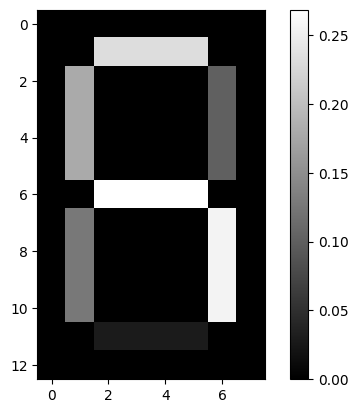

In [22]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components = 7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Which articles are similar to 'Cristiano Ronaldo'?

In the video, you learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. The NMF features you obtained earlier are available as nmf_features, while titles is a list of the article titles.

# Instructions:

- Import normalize from sklearn.preprocessing.
- Apply the normalize() function to nmf_features. Store the result as norm_features.
Create a DataFrame df from norm_features, using titles as an index.
- Use the .loc[] accessor of df to select the row of 'Cristiano Ronaldo'. Assign the result to article.
- Apply the .dot() method of df to article to calculate the cosine similarity of every row with article.
- Print the result of the .nlargest() method of similarities to display the most similar articles. This has been done for you, so hit 'Submit Answer' to see the result!

In [23]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999973
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


# Recommend musical artists part I

In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array artists whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!

# Instructions:

- Import:
NMF from sklearn.decomposition.
Normalizer and MaxAbsScaler from sklearn.preprocessing.
make_pipeline from sklearn.pipeline.
- Create an instance of MaxAbsScaler called scaler.
- Create an NMF instance with 20 components called nmf.
- Create an instance of Normalizer called normalizer.
- Create a pipeline called pipeline that chains together scaler, nmf, and normalizer.
- Apply the .fit_transform() method of pipeline to artists. Assign the result to norm_features.

In [30]:
from scipy.sparse import coo_matrix

df = pd.read_csv('scrobbler-small-sample.csv')
artists1 = df.sort_values(['artist_offset', 'user_offset'], ascending=[True, True])
row_ind = np.array(artists1['artist_offset'])
col_ind = np.array(artists1['user_offset'])
data1 = np.array(artists1['playcount'])
artists = coo_matrix((data1, (row_ind, col_ind)))

In [31]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


# Recommend musical artists part 

Suppose you were a big fan of Bruce Springsteen - which other musical artists might you like? Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. A solution to the previous exercise has been run, so norm_features is an array containing the normalized NMF features as rows. The names of the musical artists are available as the list artist_names.

# Instructions:

- Import pandas as pd.
- Create a DataFrame df from norm_features, using artist_names as an index.
- Use the .loc[] accessor of df to select the row of 'Bruce Springsteen'. Assign the result to artist.
- Apply the .dot() method of df to artist to calculate the dot product of every row with artist. Save the result as similarities.
- Print the result of the .nlargest() method of similarities to display the artists most similar to 'Bruce Springsteen'.

In [33]:
df = pd.read_csv('artists.csv', header=None)
artist_names = df.values.reshape(111).tolist()

In [34]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Bruce Springsteen    1.000000
Leonard Cohen        0.960170
Neil Young           0.948843
The Beach Boys       0.857650
Van Morrison         0.831390
dtype: float64
